# STAT 207 Project 03 - Spotify Hits of 2023

Jinna Yoon - jyoon83

Renee Huang - reneeh3

Sanjana Addanki- sadda3

## 1. Introduction

This dataset, “Most Streamed Spotify Songs 2023”, contains most of the most streamed/listened songs on Spotify (a popular music streaming platform) in 2023. Each observation/row in the dataset is a song. Some of its key features are the songs’ track name, artist(s) name, release date, Spofity playlists/charts,  and number of total streams on Spotify. This dataset also enlists some details about the song itself, including things from bpm and key/mode of the song, to ratings of danceability and energy. 

Spotify is one of the most popular music streaming platforms out there among Gen Z and millennial music listeners. Anyone in this age group who prefers using Spotify could be interested in seeing general statistics of the songs that they like. Or, anyone that wants to compare the data from Spotify with other music streaming platforms could be interested in looking deeper into this dataset.

Research Questions

1. What is the relationship between number of total streams on Spotify (response variable) and mode (major/minor), after controlling for key, in_apple_playlists, and danceability_%? How well does this model predict number of total streams on new data? 🕺

2. Is there a linear relationship between the log-odds of the songs’ mode and danceability_%, valence_%, and energy_% in the sample? How does a classifier built on this model perform on new data? We will consider 1 as Major, 0 as Minor.

In [148]:
#Imports here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

### Data Cleaning

In [149]:
na_values = ['nan']
df_old = pd.read_csv('spotify-2023.csv', encoding='latin-1', na_values = na_values)
df_old.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [150]:
df = df_old.copy()
df.columns = [col.replace('%', 'pct') for col in df.columns]
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_pct,valence_pct,energy_pct,acousticness_pct,instrumentalness_pct,liveness_pct,speechiness_pct
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [151]:
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_pct         0
valence_pct              0
energy_pct               0
acousticness_pct         0
instrumentalness_pct     0
liveness_pct             0
speechiness_pct          0
dtype: int64

In [152]:
df = df.dropna()

In [153]:
df = df[df['streams'] != 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3']

In [154]:
df['streams'].unique()

array(['141381703', '133716286', '140003974', '800840817', '303236322',
       '183706234', '725980112', '58149378', '95217315', '553634067',
       '505671438', '58255150', '387570742', '1163093654', '496795686',
       '335222234', '363369738', '86444842', '52135248', '200647221',
       '115364561', '78300654', '899183384', '61245289', '429829812',
       '127408954', '22581161', '52294266', '843957510', '999748277',
       '618990393', '188933502', '1355959075', '786181836', '176553476',
       '354495408', '2808096550', '1109433169', '1047101291', '570515054',
       '1647990401', '2565529693', '518745108', '107753850', '177740666',
       '153372011', '57876440', '256483385', '1214083358', '111947664',
       '156338624', '720434240', '357925728', '674072710', '1755214421',
       '404562836', '373199958', '14780425', '39578178', '54266102',
       '751134527', '1356565093', '1592909789', '635412045', '1230675890',
       '585695368', '43857627', '2009094673', '600976848', '39709

In [155]:
df['streams'] = pd.to_numeric(df['streams'])
df['streams'] = df['streams'].astype('int64')

I ran into some trouble with converting the 'streams' variable from an object to an integar because of multiple errors. Here, I used this code to make streams into a numeric value and as type integar 64 to account for the 'large size integar' error that kept recurring.

In [156]:
df.isna().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_pct        0
valence_pct             0
energy_pct              0
acousticness_pct        0
instrumentalness_pct    0
liveness_pct            0
speechiness_pct         0
dtype: int64

In [157]:
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_pct         int64
valence_pct              int64
energy_pct               int64
acousticness_pct         int64
instrumentalness_pct     int64
liveness_pct             int64
speechiness_pct          int64
dtype: object

## 2. Linear Regression

Research question: What is the relationship between number of total streams on Spotify (response variable) and mode (major/minor), after controlling for key, in_apple_playlists, and danceability_%? How well does this model predict number of total streams on new data?

In [158]:
df_train, df_test = train_test_split(df, test_size = 0.20, random_state = 207)
print(df_train.shape[0]/df.shape[0])

0.7990196078431373


In [159]:
lin_reg = smf.ols('streams ~ mode + key + in_apple_playlists + danceability_pct', data = df_train).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                streams   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     59.69
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          4.52e-101
Time:                        00:35:42   Log-Likelihood:                -13753.
No. Observations:                 652   AIC:                         2.753e+04
Df Residuals:                     638   BIC:                         2.760e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            3.14e+08   7.94e+07      3.953      0.000    1.58e+08     4.7e+08
mode[T.Minor]      -1.408e+06      3e+07     -0.047      0.963   -6.04e+07    5.76e+07
key[T.A#]           5.107e+07    7.1e+07      0.719      0.472   -8.84e+07    1.91e+08
key[T.B]            8.547e+06   6.71e+07      0.127      0.899   -1.23e+08     1.4e+08
key[T.C#]           5.469e+07   6.08e+07      0.900      0.368   -6.46e+07    1.74e+08
key[T.D]           -6.542e+06   6.59e+07     -0.099      0.921   -1.36e+08    1.23e+08
key[T.D#]           7.535e+06    8.5e+07      0.089      0.929   -1.59e+08    1.74e+08
key[T.E]            4.992e+07   7.08e+07      0.705      0.481   -8.91e+07    1.89e+08
key[T.F]            5.601e+07   6.38e+07      0.877      0.381   -6.93e+07    1.81e+08
key[T.F#]            -4.1e+07   6.53e+07     -0.628      0.530   -1.69e+08    8.72e+07
key[T.G]           -2.636e+07   6.11e+07     -0.431      0.666   -1.46e+08    9.36e+07
key[T.G#]          -3.033e+07   6.29e+07     -0.482      0.630   -1.54e+08    9.32e+07
in_apple_playlists  5.053e+06   1.86e+05     27.211      0.000    4.69e+06    5.42e+06
danceability_pct   -2.421e+06   9.89e+05     -2.448      0.015   -4.36e+06   -4.79e+05
==============================================================================
Omnibus:                      401.924   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6635.344
Skew:                           2.434   Prob(JB):                         0.00
Kurtosis:                      17.851   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [160]:
df['key'].value_counts()
#We can see that baseline is A

key
C#    115
G      91
F      87
G#     85
D      78
B      77
A      70
F#     69
E      59
A#     55
D#     30
Name: count, dtype: int64

Linear Regression Equation for Model that Predicts Total Number of Streams Based on: mode, key, in_apple_playlists, and danceability_%

Total streams predicted = 3.14e+08 - 1.408e+06 * minor +(5.107e+07 * A# key) + (8.547e+06 * B key) + (5.469e+07 * C# key_ + (-6.542e+06 * D key) + (7.535e+06 * D# key) + (4.992e+07 * E key) + (5.601e+07 * F key)+( - 4.1e+07 * F# key) +(-2.636e+07 * G key)+( - 3.033e+07 * G# key) + (5.053e+06 * in_apple_playlists) +(- 2.421e+06 * danceability_pct)

For songs that are in the mode minor compared to songs that are in the mode major, the predicted average total number of streams for a song on Spotify decrease by 1.408+e06, on average, holding key, in_apple_playlists, and danceability_ constant. 

We are 95% confident that the true population slope for how the mode of the song (major or minor) affects the total number of streams for a song on Spotify is contained in the interval ( -6.04e+07 and 5.76e+07). 

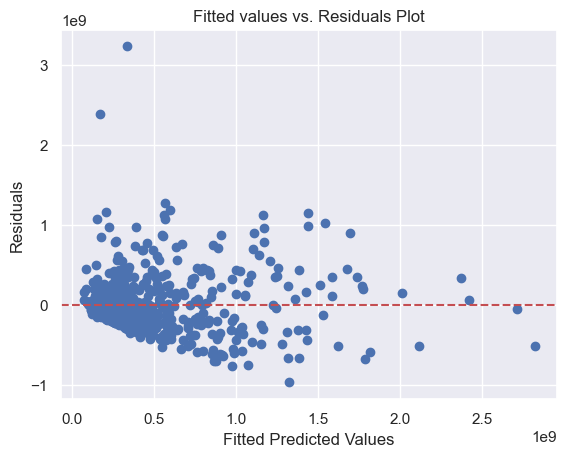

In [161]:
#Checking for linear regression conditions
#residual plot
y_pred_train = lin_reg.predict(df_train[['mode', 'in_apple_playlists', 'key', 'danceability_pct']])
resid_train = df_train['streams'] - y_pred_train
plt.scatter(y_pred_train, resid_train)
plt.axhline(y=0, color = 'r', linestyle = '--')
plt.xlabel('Fitted Predicted Values')
plt.ylabel('Residuals')
plt.title('Fitted values vs. Residuals Plot')
plt.show()

We assume independence because listening to one song does not mean that it affects the number of streams for the other. A person can listen to multiple songs, and many.

Looking at this residual plot, we can see a lot of clustering around the residual = 0 and fitted predicted values 0-1.0. If we were to section each region of this graph proportionally, we can see that the values are not distributed evenly. Therefore we will conclude that this model is not a good fit for linearity. We do not have equal variance because we do not have parallel scatter of residual values in our plot.

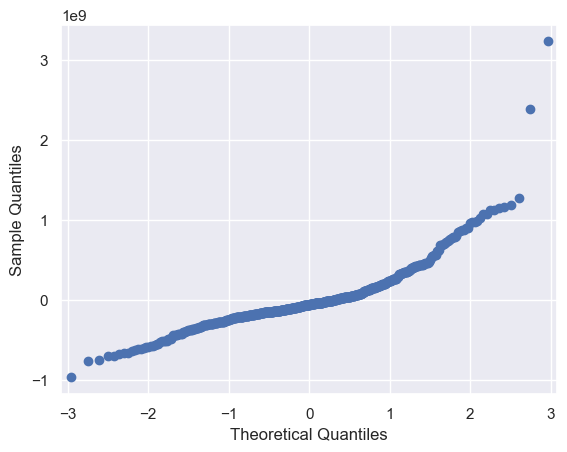

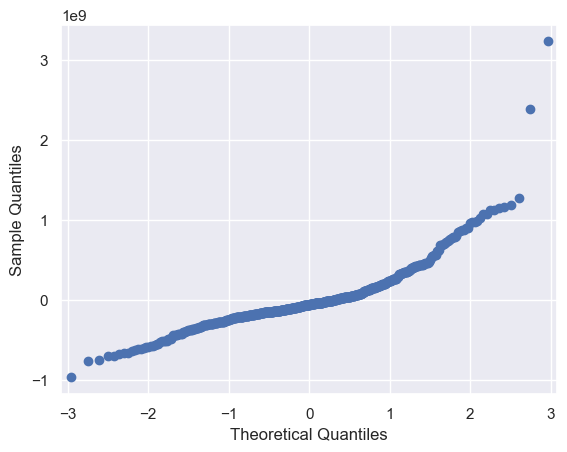

In [162]:
import statsmodels.api as sm
sm.qqplot(resid_train)

We can see here from the qqplot, that the distribution of our residuals is approximately normal. The values line up fairly nicely to a semi-straight line.

In [163]:
#multicollinearity between quant variables
df_train[['in_apple_playlists', 'danceability_pct']].corr()

,in_apple_playlists,danceability_pct
in_apple_playlists,1.000000,-0.010751
danceability_pct,-0.010751,1.000000


Looking at this correlation matrix, it appears that there is no multicollinearity between our quantitative predictors due to the low correlation coefficient. This fulfills one of our conditions for linear regression.

With a R^2 value of 0.549, the percent of variability in total streams a song has on spotify is explained by this model in the training data is relatively high, meaning that the model explains a significant portion of the variability, but it is not extremely high. 

In [164]:
observation = df[df['track_name'] == 'Seven (feat. Latto) (Explicit Ver.)']
observation

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_pct,valence_pct,energy_pct,acousticness_pct,instrumentalness_pct,liveness_pct,speechiness_pct
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4


In [165]:
observation['in_apple_playlists']

0    43
Name: in_apple_playlists, dtype: int64

In [166]:
predicted_value = 3.14e+08 + 0 + 8.547e+06	+ (43 * 5.053e+06) + (80 * -2.421e+06)
residual = 141381703 - predicted_value
residual

-204764297.0

In [167]:
df_train['key'].unique()

array(['F', 'A', 'C#', 'G', 'F#', 'A#', 'G#', 'E', 'D', 'B', 'D#'],
      dtype=object)

In [168]:
from sklearn.metrics import mean_squared_error
y_pred_train = lin_reg.predict(df_train[['streams', 'mode', 'key', 'in_apple_playlists', 'danceability_pct']])
rmse_train = mean_squared_error(df_train['streams'], y_pred_train , squared = False)
rmse_train

350423589.31288344

In [169]:
from sklearn.metrics import mean_squared_error
y_pred = lin_reg.predict(df_test[['streams', 'mode', 'key', 'in_apple_playlists', 'danceability_pct']])
rmse_test = mean_squared_error(df_test['streams'], y_pred, squared = False)
rmse_test

350809406.4536591

The typical size of the residual associated with this model for the training data is 350423589.31288344 streams. This is an estimate for how far an observation falls from its predicted value using the model. This estimate falls very far from our actual observation. 

Roughly, the typical size of the residual associated with this model for the testing data is 350809406.4536591   stream This estimate, very close to the training data's RMSE, is also very high and falls very far from our actual observation.. 

Approach taken: 

The research question that we would like to answer is if there is a relationship between number of total streams on Spotify (response variable) and mode (major/minor), after controlling for key, in_apple_playlists, and danceability_%. We also wanted to know how well this model can predict the number of total streams on new data (test data). 

We actually had to do a bit of cleaning with my response variable in order to fit it in our model with the training data. Looking at the data's variable types using the dtypes attribute, the response variable 'streams' was actually an object type. We then converted it into an integer. After that, we split 80% of the dataset into training data and 20% of it to testing data.

Creating my linear regression was much easier now with this integer type response variable. We created a model for total streams predicted = 3.14e+08 - 1.408e+06 * minor +(5.107e+07 * A# key) + (8.547e+06 * B key) + (5.469e+07 * C# key_ + (-6.542e+06 * D key) + (7.535e+06 * D# key) + (4.992e+07 * E key) + (5.601e+07 * F key)+( - 4.1e+07 * F# key) +(-2.636e+07 * G key)+( - 3.033e+07 * G# key) + (5.053e+06 * in_apple_playlists) +(- 2.421e+06 * danceability_pct). 

We then derived a few interpretations and evaluations from this model summary. We found that the selected slope coefficient that described our two variables of interest (predicted number of streams and mode) was 1.408+e06. For a 95% confidence interval (also included in the model summary), we interpreted that we are 95% confident that the true population slope for how the mode of the song (major or minor) affects the total number of streams for a song on Spotify is contained in the interval ( -6.04e+07 and 5.76e+07). 

In regards to checking all linear regression conditions, the residual plot suggests that this model does not fit well. There is a lot of clustering in one area, which should not how a properly fitted model's residual plot should look like. 

Looking back at our model summary, we identified this model to have a R^2 value of 0.549, meaning that the the percent of variability in total streams a song has on Spotify is explained by this model in the training data is moderate to moderately high. 
To test how well this model could predict data, we picked an observation (Seven by Jungkook) and calculated the residual. We were off by a large amount, -204764297.0. This means that our predicted value was 204764297.0 higher than our actual stream value.

When calculating the RMSE of both the training and testing data, we also found an extremely large number of around 350809000 streams. This means that our estimate for this model for an observation falls very far from its actual value. This suggests that this model may not be the best fit for our data/what we're trying to predict. 



## 3. Logistic Regression Analytical Tasks

Research Question: Is there a linear relationship between the log-odds of the songs’ mode and danceability_%, valence_%, and energy_% in the sample? How does a classifier built on this model perform on new data? We will consider 1 as Major, 0 as Minor.

In [170]:
df_train['mode']=(df_train['mode']=='Major').astype(int)
df_train['mode'].value_counts()

mode
1    358
0    294
Name: count, dtype: int64

In [171]:
log_reg = smf.logit("mode ~ danceability_pct + 	valence_pct + energy_pct", data=df_train).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.669897
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   mode   No. Observations:                  652
Model:                          Logit   Df Residuals:                      648
Method:                           MLE   Df Model:                            3
Date:                Tue, 23 Apr 2024   Pseudo R-squ.:                 0.02677
Time:                        00:35:44   Log-Likelihood:                -436.77
converged:                       True   LL-Null:                       -448.79
Covariance Type:            nonrobust   LLR p-value:                 2.468e-05
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.3756      0.501      4.743      0.000       1.394       3.357
danceability_pct    -0.0247      0.006     -4.006      0.000      -0.037      -0.013
valence_pct         -0.0013      0.004     -0.325      0.745      -0.009       0.006
energy_pct          -0.0067      0.005     -1.235      0.217      -0.017       0.004
====================================================================================
"""

A lower danceability_pct, a higher valence_pct, and lower energy_pct would be associated with a higher probability of success. With the coefficients for danceability_pct and valence_pct being negative, the higher those values are, the lower the probability gets. Hence, having lower values for explanatory variables that have negative coefficients and having higher values for explanatory variables that have positive coefficients would yield a higher probability of success. 

In [172]:
from sklearn.metrics import roc_auc_score

df_train['pred_prob'] = log_reg.predict(df_train)
auc = roc_auc_score(y_true=df_train['mode'], y_score=df_train['pred_prob'])
auc

0.6027296393417703

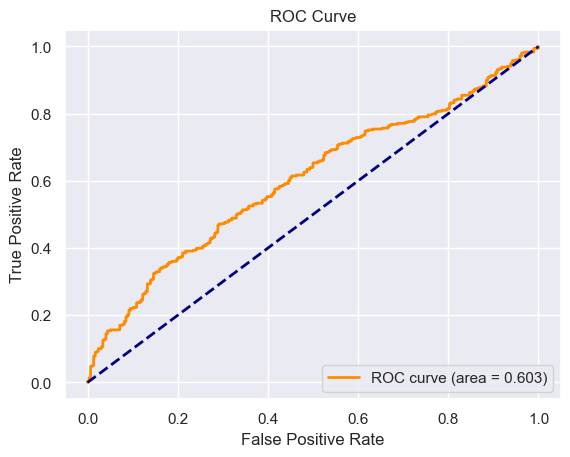

In [173]:
from sklearn.metrics import roc_curve
fprs, tprs, thresholds = roc_curve(y_true=df_train['mode'], y_score=df_train['pred_prob'])
pd.DataFrame({'fpr': fprs, 'tpr': tprs})

def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

plot_roc(fprs, tprs, auc)

The Pseudo R^2 value is 0.02677 and the AUC is 0.603. The Psuedo R^2 value being 0.02677 would indicate that the strength of the model is low, as that value represents how the model explains the variability in the response variables. With a Psuedo R^2 value of 0 indicating the model does not explain any of the variability in the response variable and 1 indicates a perfect fit, the strength of the model is pretty low. To have a strong logistic regression model with good predictive power, there needs to be a high pseudo R^2 and high AUC. 

In [174]:
from sklearn.metrics import confusion_matrix

df_train['pred_classifier'] = (df_train['pred_prob'] > 0.5).astype(int)

cm = confusion_matrix(y_true=df_train['mode'], y_pred=df_train['pred_classifier'])
cm

array([[128, 166],
       [104, 254]], dtype=int64)

We chose 0.5 as the threshold as, on the ROC curve, that’s the point with the most distance. Additionally. since both false positive and false negative have no significant impact, the threshold value is unimportant and could have been chosen arbitrarily.

In [175]:
tn, fp, fn, tp = confusion_matrix(y_true=df_train['mode'], y_pred=df_train['pred_classifier']).ravel()
(tn, fp, fn, tp)

(128, 166, 104, 254)

We want to minimize false positives because in the data regarding the amount of false positives or negatives, there is a significantly larger number of false positives while a good model would have a similar amount of false positives and negatives. Thus, we would want to minimize false positives to achieve this. In this case, a false positive would be the model telling us the song’s mode is major while it is actually minor.

In [176]:
accuracy = (tp + tn) / (tp + tn + fp + fn)

sensitivity = tp / (tp + fn)

specificity = tn / (tn + fp)

print( accuracy, sensitivity, specificity)

0.5858895705521472 0.7094972067039106 0.43537414965986393


Since we expect false positive and negative to be about equal and there is a lot more false positives 166 than false negatives 104, we want to minimize false positive. That means we want to decrease specificity and increase the predictive probability threshold. Because the specificity is quite low 0.43537414965986393, we are generally satisfied with the performance of our current classifier.

We wanted to answer whether or not there is a linear relationship between the log-odds of the songs’ mode and danceability_%, valence_%, and energy_% in the sample?  We consider 1 as Major, 0 as minor. We did df['mode']=(df['mode']=='Major').astype(int) to set Major as 1 and minor as 0. 

We used the training data and fit a logistic regression model to predict the log odds of mode using danceability, valence, and energy. . 


The Pseudo R^2 value, at 0.02677, shows that the model's strength is weak. This number tells us how much the model can explain about the data. When the value is 0, it means the model doesn't explain anything, and when it's 1, it means the model is perfect. So, our model's ability to explain things is quite limited.

 We then plotted a ROC Curve to pick a predictive probability threshold and AUC which is 0.603. The threshold is chosen at the point on the ROC curve where the distance from the top-left corner (0, 1) is maximized. In this case, it's 0.5.

For a good logistic regression model that can predict well, we want both the Pseudo R^2 and AUC values to be high. These numbers tell us how well the model fits the data and how good it is at distinguishing between different groups in the data.

We also looked into the performance of the classifier. Since the false positives significantly outnumber false negatives, it shows we should have the threshold to be changed to reduce false positives. The classifier that we used is quite good as it reduces false positives.

Text(0.5, 1.0, 'Plot fitted predicted prob vs deviance')

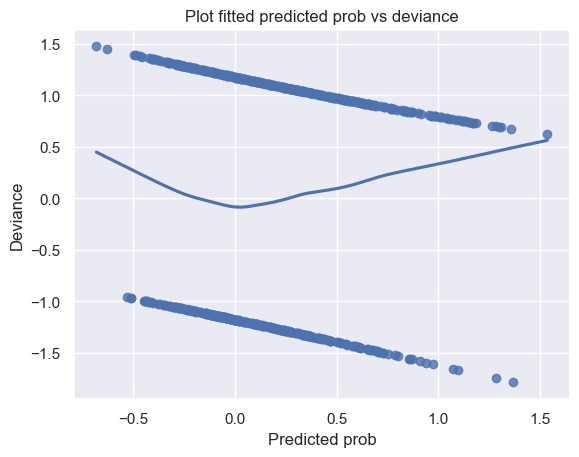

In [177]:
sns.regplot(data=df, x= log_reg.fittedvalues, y=log_reg.resid_dev, lowess = True)
plt.xlabel('Predicted prob')
plt.ylabel('Deviance')
plt.title("Plot fitted predicted prob vs deviance")

## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes on their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

## 4. Conclusion

Summarizing Linear Regression Analysis:

We wanted to determine if there was a linear relationship between number of total streams on Spotify (response variable) and mode (major/minor), after controlling for key, in_apple_playlists, and danceability_% and if the data that we trained for this model was good at predicting the number of total streams on new data. The R^2 value for this model was moderately strong, but still did not account for as much variability as we typically would have wanted. The RMSE for both the training and testing data was very high at around 350,000,000 streams. Also considering how the residuals plot looked (lots of clustering instead of proportional scatter), both the RMSE and residual plot suggest that this model was not the best fit for the data we used to predict the total number of streams a song on Spotify had. 

Summarizing Logistic Regression Analysis:

We examined whether a linear relationship exists between the log odds of song mode and danceability, valence, and energy. Major mode was encoded as 1 and minor as 0. The resulting Pseudo R^2 value suggests weak model strength, indicating limited explanatory power. The ROC Curve, yielding an AUC of 0.603, aided in selecting a predictive probability threshold of 0.5.

Performance evaluation revealed a notable surplus of false positives, signaling the necessity of adjusting the threshold to mitigate them. Despite this, the classifier demonstrated efficacy in reducing false positives, indicating its utilit
y.
We generated a fitted vs residual plot and because the line is not as flat as it could be, this model is not the best for examining a linear relationship between the log-odds of the songs’ mode and danceability, valence, and energy. Generally, a good model would create a flat line for the fitted vs residual plt.


Some limitations we faced when working on this project was creating proper variable types for our response variables. For linear regression, we saw that the response variable for streams was not the expected integer type. Therefore, we had to transform this via code. For logistic regression, we had to change the categorical response variable into one that was binary. Unfortunately, the dataset was not as cleaned up as we liked so we had to look into each individual row and see what values were missing or unusual. 

Also, because we only know how to fit a linear/logistic regression model, we are not sure if either of these are the best for analyzing/predicting the data. If we knew how to fit other models, we could compare those and see which one seems best out of more options.

For future work:

We might want to see if there is a better model to fit for predicting total number of streams on Spotify for a certain song because we saw that our linear regression model was not the best fit when analyzing if the model fit the linear regression conditions. 

A future researcher could expand the dataset more to compare with Spotify’s competing platforms that are outside of the ones included, such as Pandora, Soundcloud, or iHeartRadio. They could possibly compare the listening relationship with certain genres of songs amongst the different platform using number of total streams for a certain song.